In [24]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
pd.set_option("display.max_row", 81)
pd.set_option("display.max_column", 80)

In [4]:
data = pd.read_csv("../../datasets/All.csv")

In [5]:
data.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,0,0,0,0,0,0,0,0,0,58,25,26,26,13,1,2,0.448276,0.034483,0.08,0.431034,1.04,0.076923,0,-1,5,-1,0.6,-1,1,0,0,0,1,-1,47,22,8,13,0,-1,13,14,13,5,-1,0,0,3,0,2,-1,0.017241,0.0,0.0,0.066667,1.0,-1.0,8,3,2,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,0,0,0,0,0,0,0,0,0,66,25,34,34,2,2,2,0.515151,0.030303,0.08,0.378788,1.36,0.058824,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,56,22,8,13,9,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,0,0,0,0,0,0,0,0,0,65,25,33,33,2,2,2,0.507692,0.030769,0.08,0.384615,1.32,0.060606,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,55,22,8,13,8,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,0,0,0,0,0,0,0,0,0,109,25,77,77,2,2,2,0.706422,0.018349,0.08,0.229358,3.08,0.025974,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,92,22,8,13,45,-1,52,14,13,13,-1,0,0,4,0,8,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,0,0,0,0,0,0,0,0,0,81,25,49,49,2,2,2,0.604938,0.024691,0.08,0.308642,1.96,0.040816,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,70,22,8,13,23,-1,24,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


# 1.Exploration des données

## objectif : 
- comprendre du mieux possible nos données
- développer une premiere strategie de modélisation

## Checklist de base 
#### Analyse de forme :
- **variable target** : URL_Type_obf_Type 
- **lignes et colonnes** :  36707, 80
- **types de variables** : 21 quantitative, 59 qualitative
- **analyse des valeurs manquantes** : 2 colonnes avec beaucoup de données manquantes (NumberRate_Extension (1/3) et Entropy_DirectoryName (1/4))
                                    7 colonnes avec moins de 1 % de données manquantes (supprimer les colonnes ou remplacer âr des valeurs ?)
                                    (avgpathtokenlen, Entropy_Filename, Entropy_Extension ,NumberRate_DirectoryName, NumberRate_FileName, Entropy_Afterpath, NumberRate_AfterPath )
                                    toutes les autres colonnes sont remplies.

#### Analyse de fond :
- **visualisation de la target** : dataset equilibré
- **Signification des variables** :
        - variables quantitatives non standardisées, certains semblent suivre une courbe gaussienne et d'autres semblent présenter des outsiders
        - ISIpAddressInDomainName a une unique valeur (ne sert a rien)
        

- **relation variable/target** :

In [6]:
df = data.copy()

In [7]:
df.shape

(36707, 80)

int64      58
float64    21
object      1
dtype: int64

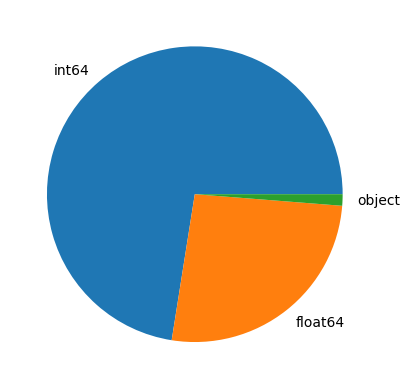

In [10]:
df.dtypes.value_counts().plot.pie()
df.dtypes.value_counts()


In [23]:
df.replace("?", np.nan, inplace = True)
df.replace([np.inf, -np.inf], np.nan, inplace = True)

<Axes: >

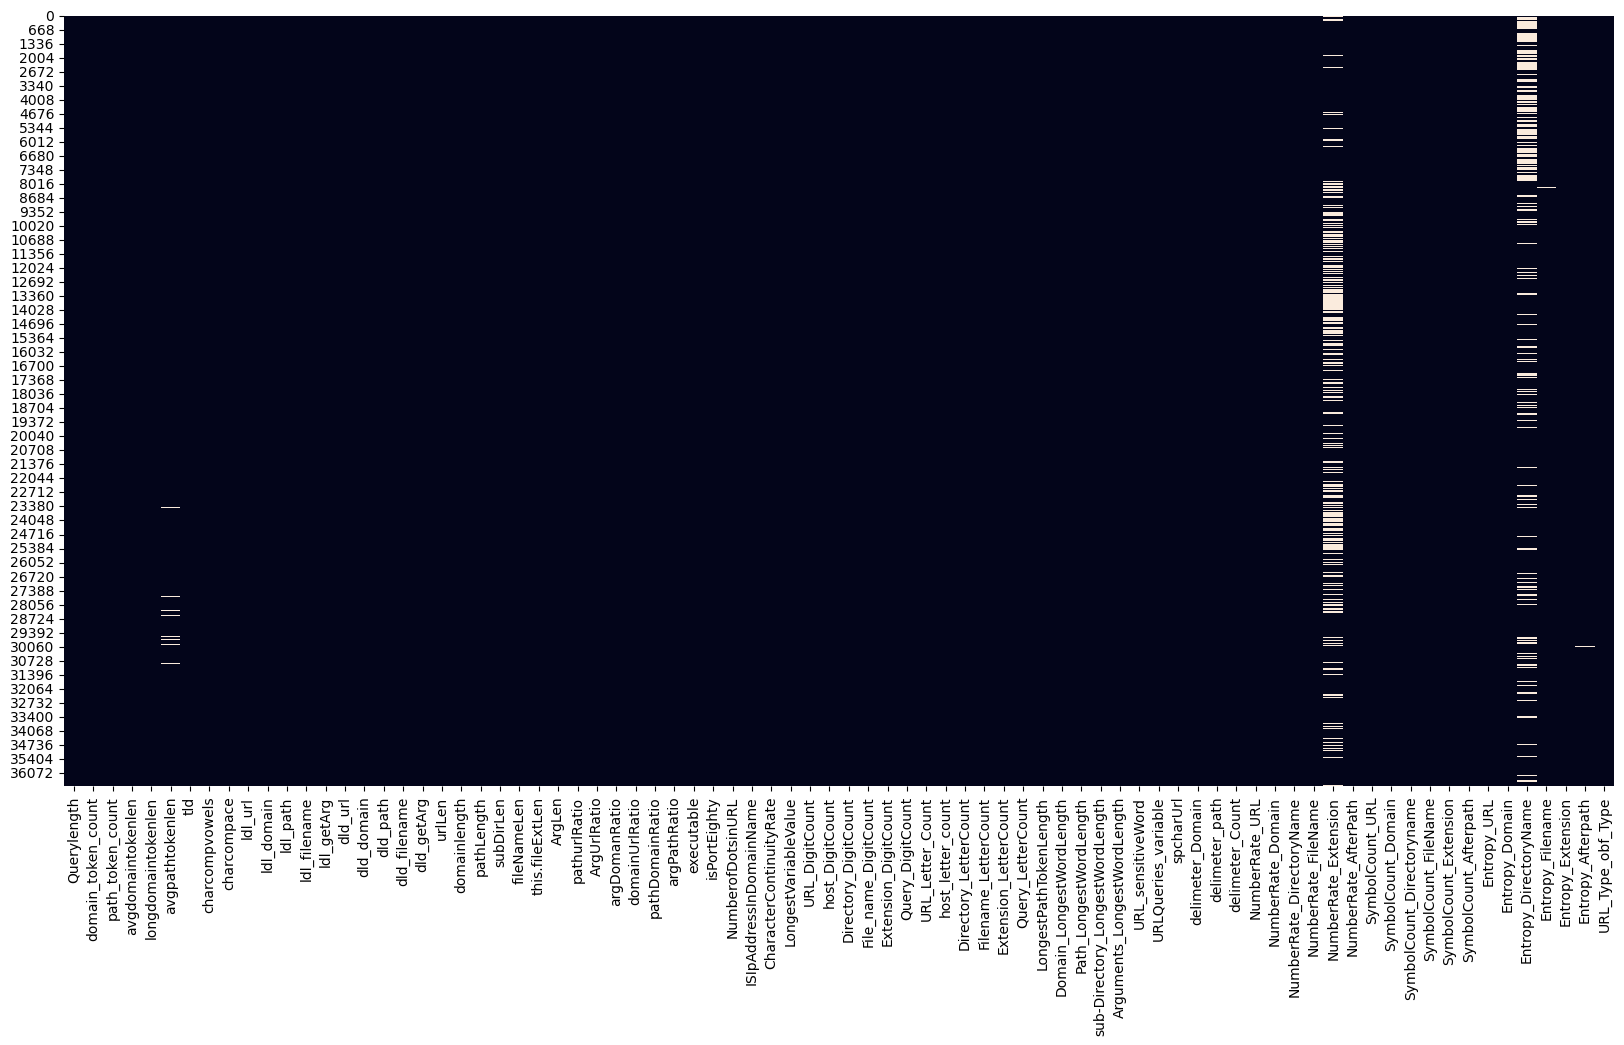

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar = False)

In [25]:
(df.isna().sum()/df.shape[0]).sort_values(ascending = False)

NumberRate_Extension               0.275969
Entropy_DirectoryName              0.230692
avgpathtokenlen                    0.007628
Entropy_Filename                   0.006429
Entropy_Extension                  0.001090
argPathRatio                       0.000272
NumberRate_DirectoryName           0.000272
NumberRate_FileName                0.000272
Entropy_Afterpath                  0.000163
NumberRate_AfterPath               0.000082
Querylength                        0.000000
Arguments_LongestWordLength        0.000000
sub-Directory_LongestWordLength    0.000000
Path_LongestWordLength             0.000000
Domain_LongestWordLength           0.000000
Extension_LetterCount              0.000000
LongestPathTokenLength             0.000000
Query_LetterCount                  0.000000
URLQueries_variable                0.000000
Filename_LetterCount               0.000000
Directory_LetterCount              0.000000
host_letter_count                  0.000000
URL_Letter_Count                

## Analyse de fond

Examen de la colonne target




In [20]:
df["URL_Type_obf_Type"].value_counts()

Defacement    7930
benign        7781
phishing      7586
malware       6712
spam          6698
Name: URL_Type_obf_Type, dtype: int64

## histogramme des variables continues

/tmp/ipykernel_36814/2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/tmp/ipykernel_36814/2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/tmp/ipykernel_36814/2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed i

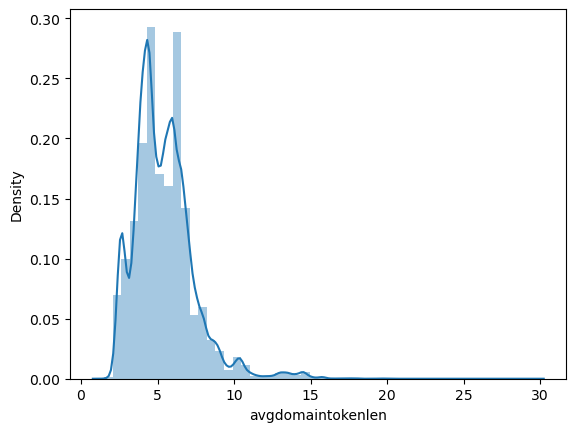

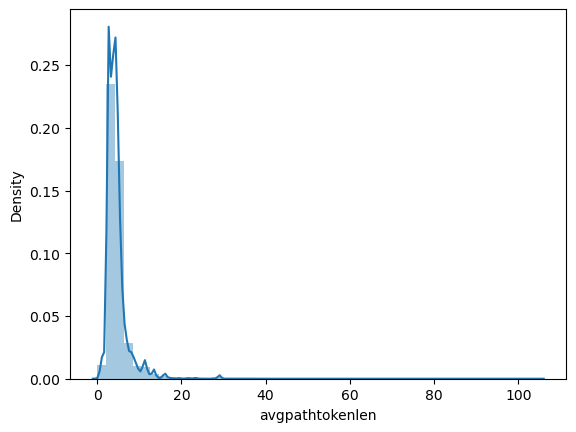

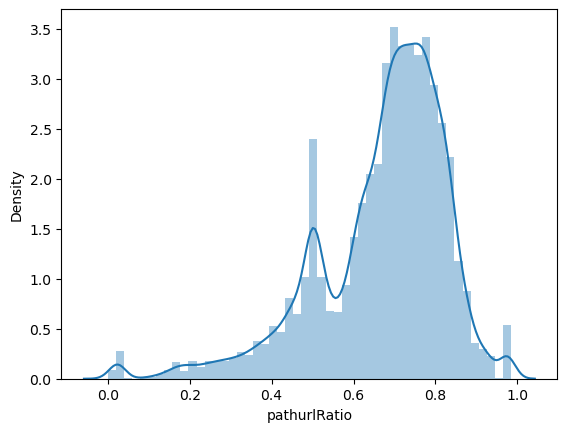

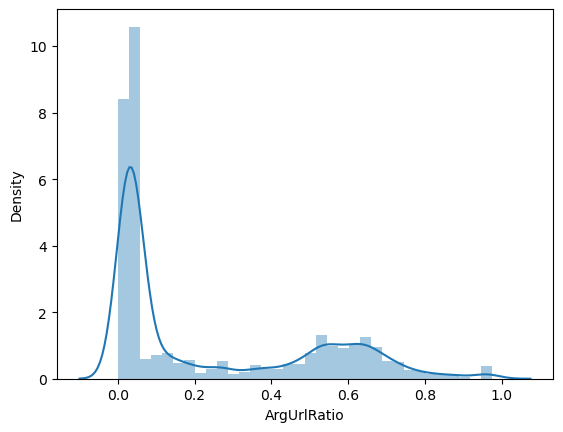

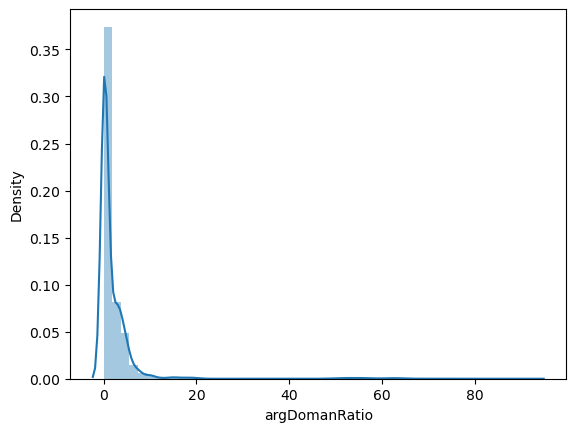

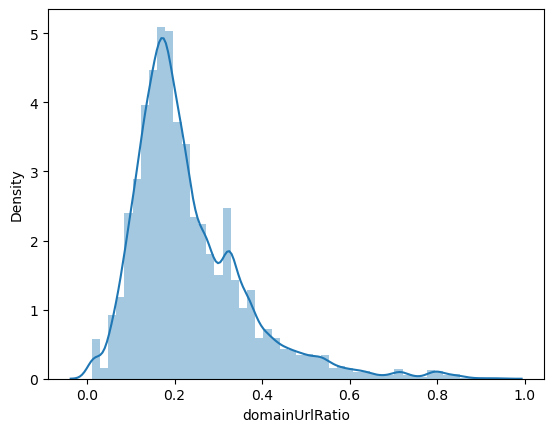

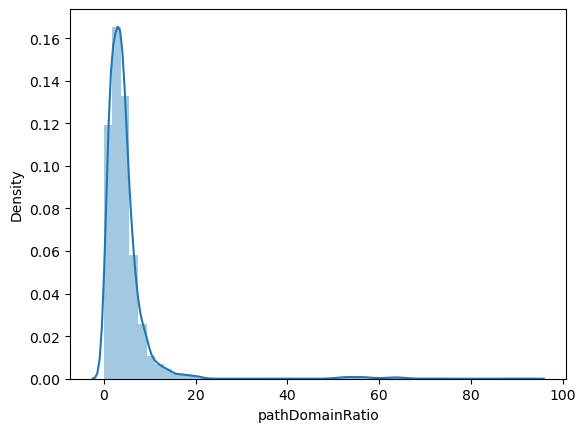

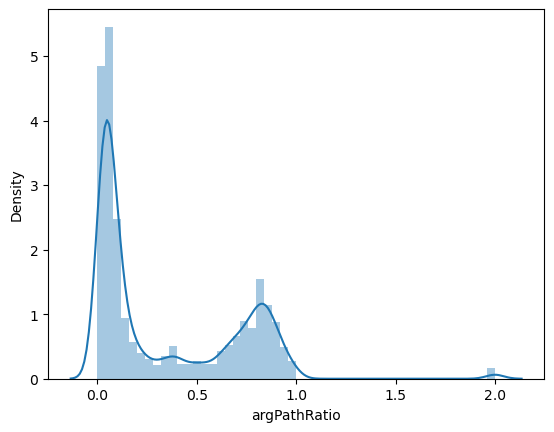

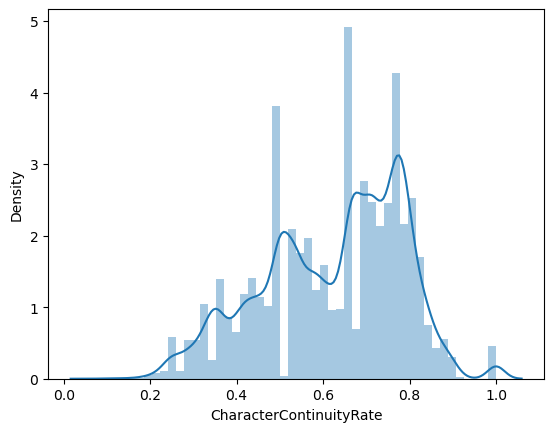

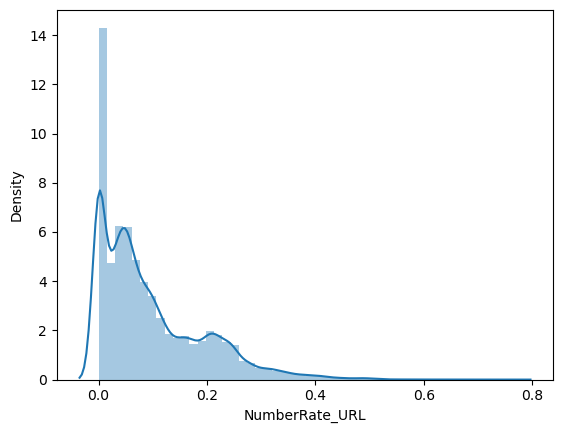

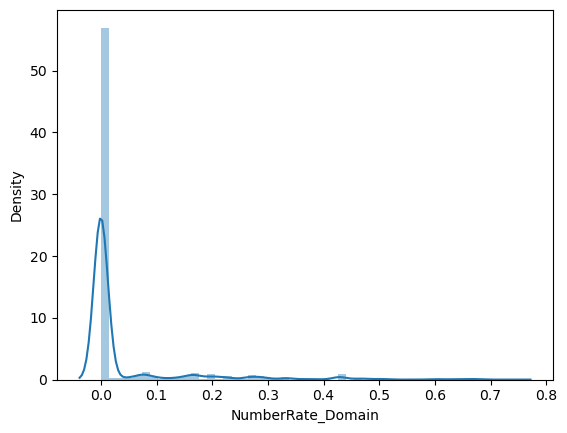

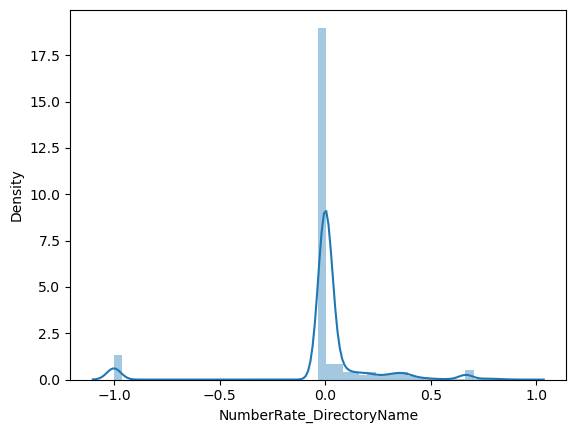

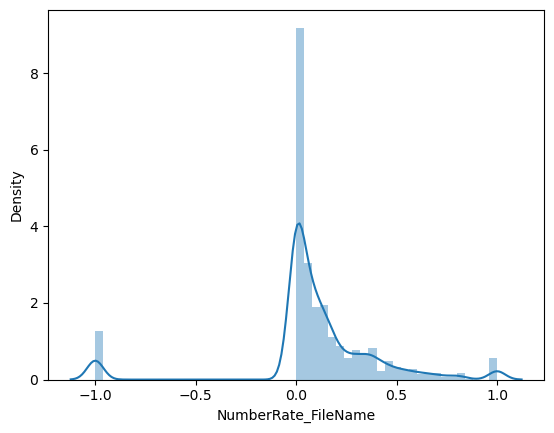

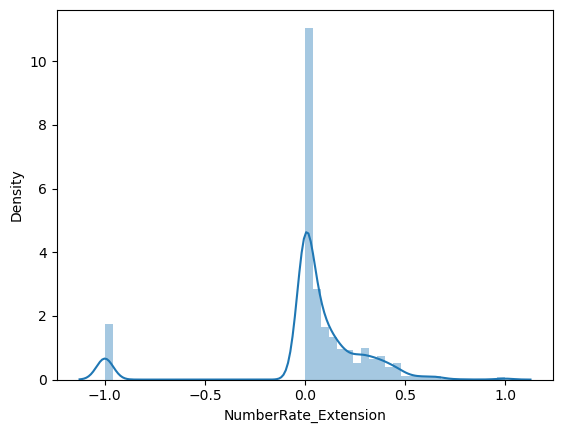

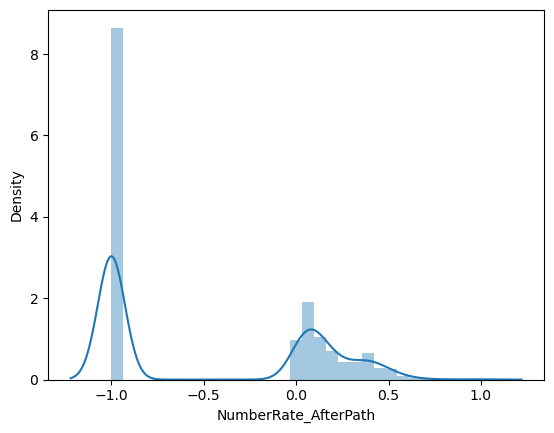

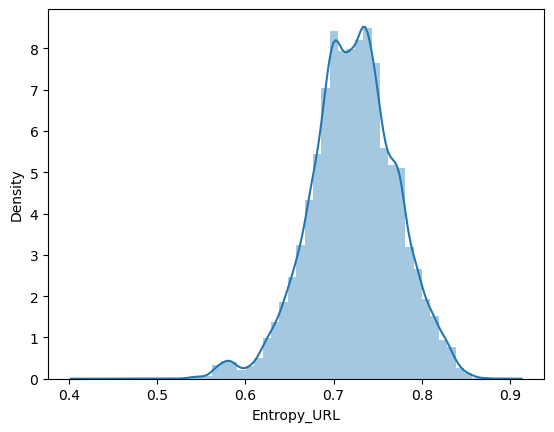

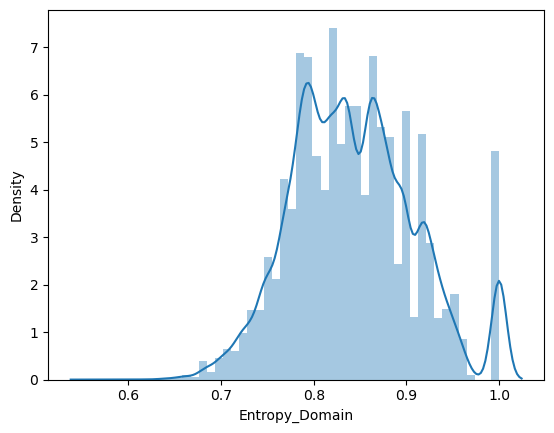

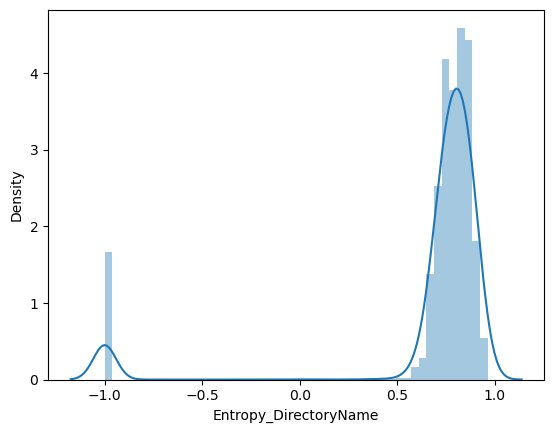

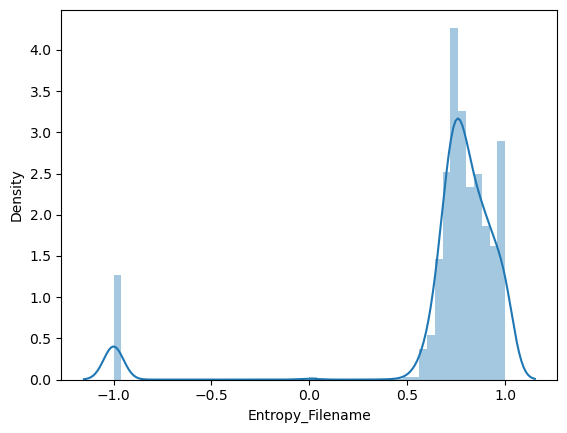

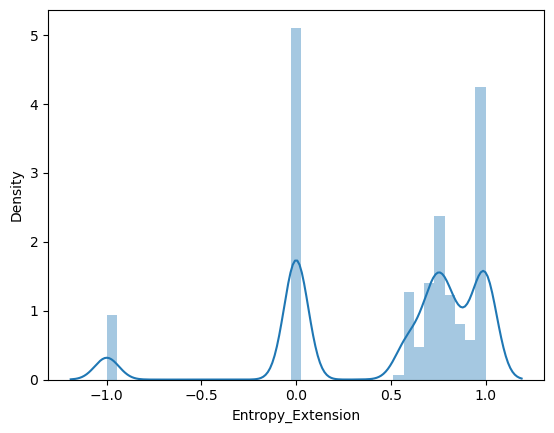

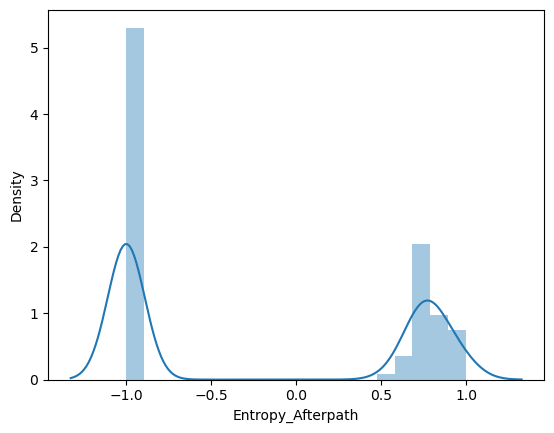

In [26]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

## Variable qualitatives

In [36]:
for col in df.select_dtypes('int'):
    #plt.figure()
    #sns.displot(df[col])
    print(f"{col :-<50} {len(df[col].unique())}")

Querylength--------------------------------------- 319
domain_token_count-------------------------------- 15
path_token_count---------------------------------- 43
longdomaintokenlen-------------------------------- 52
tld----------------------------------------------- 15
charcompvowels------------------------------------ 150
charcompace--------------------------------------- 127
ldl_url------------------------------------------- 133
ldl_domain---------------------------------------- 20
ldl_path------------------------------------------ 132
ldl_filename-------------------------------------- 22
ldl_getArg---------------------------------------- 132
dld_url------------------------------------------- 34
dld_domain---------------------------------------- 12
dld_path------------------------------------------ 33
dld_filename-------------------------------------- 15
dld_getArg---------------------------------------- 31
urlLen-------------------------------------------- 389
domainlength---------

## relation target/variable

### creation des sous ensemble

In [55]:
target = "URL_Type_obf_Type"

spam_df = df[df[target] == "spam"]
defacement_df = df[df[target] == "Defacement"]
phishing_df = df[df[target] == "phishing"]
malware_df = df[df[target] == "malware"]
benign_df = df[df[target] == "benign"]

/tmp/ipykernel_36814/3744623062.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spam_df[col], label = "spam")
/tmp/ipykernel_36814/3744623062.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(defacement_df[col], label = "defacement")
/tmp/ipykernel_36814/3744623062.py:5: UserWarning: 

`di

ValueError: could not convert string to float: 'spam'

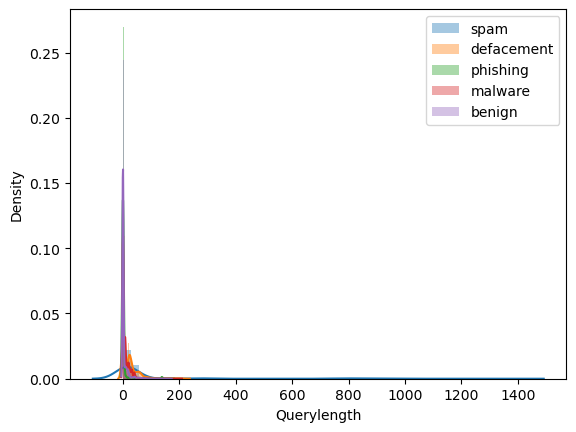

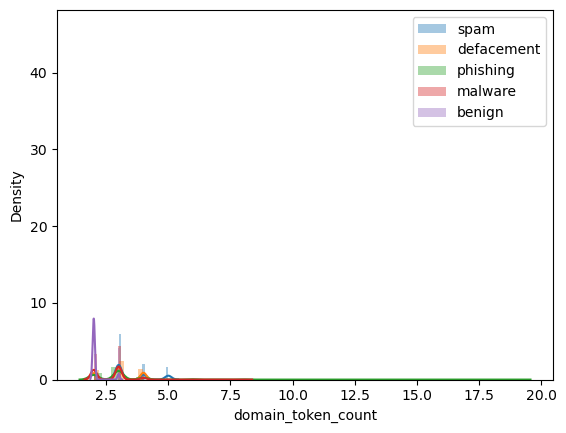

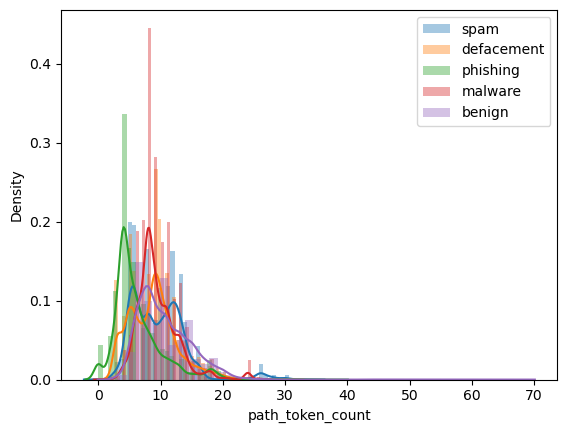

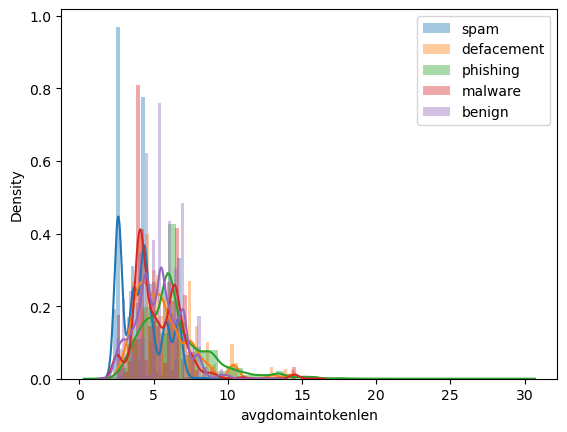

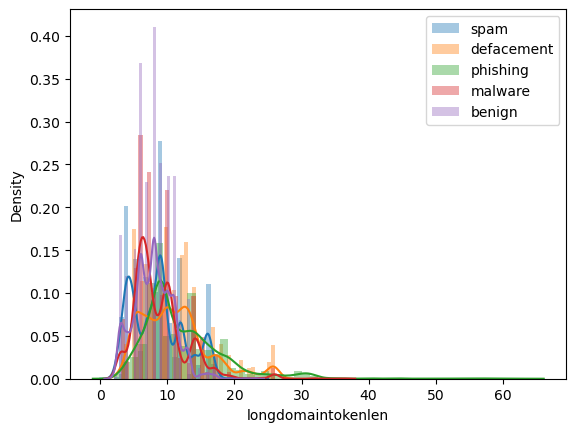

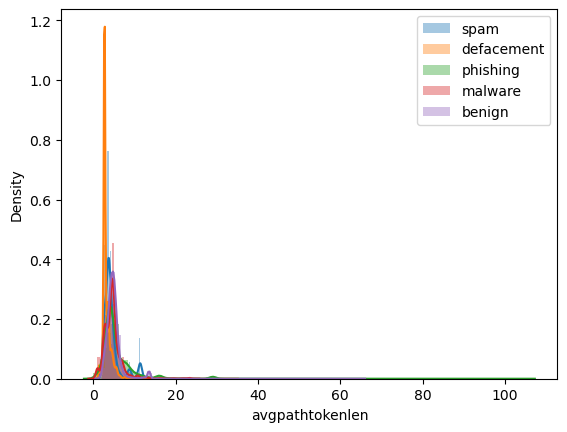

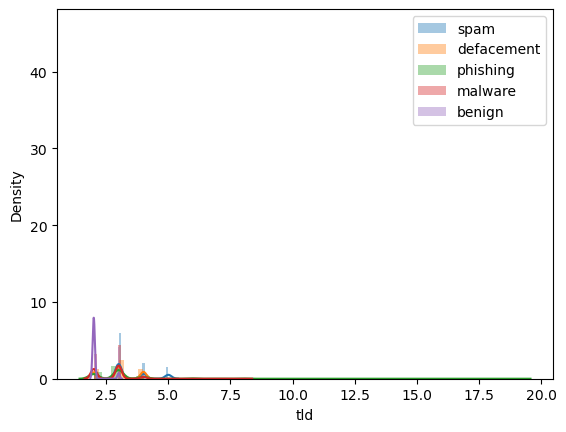

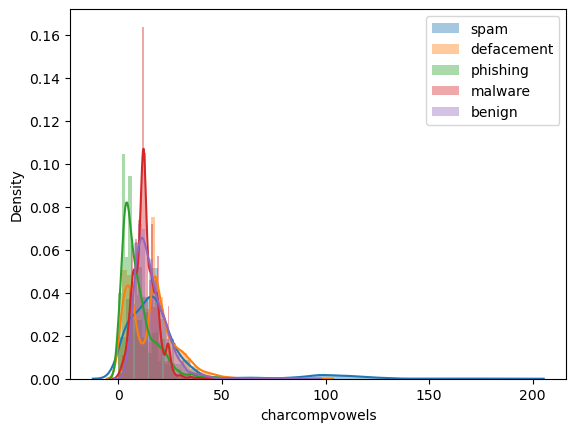

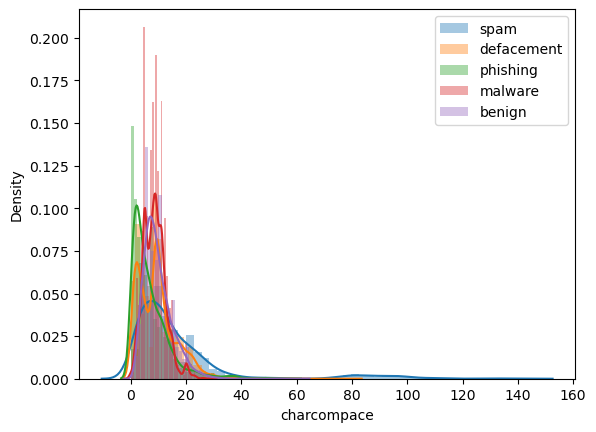

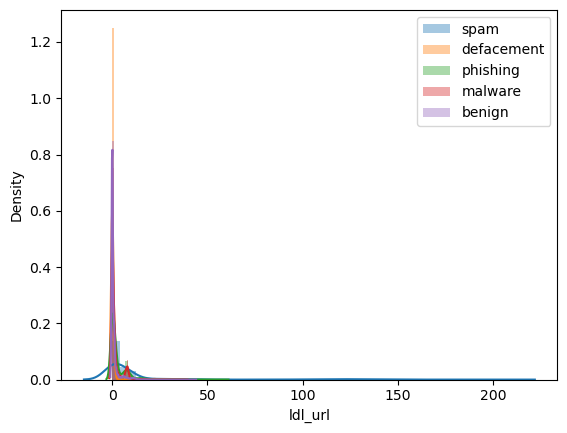

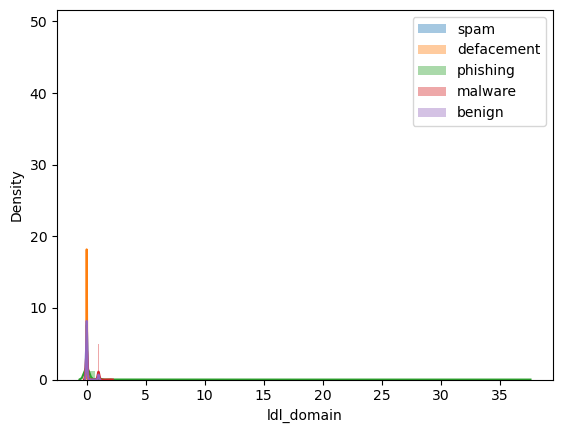

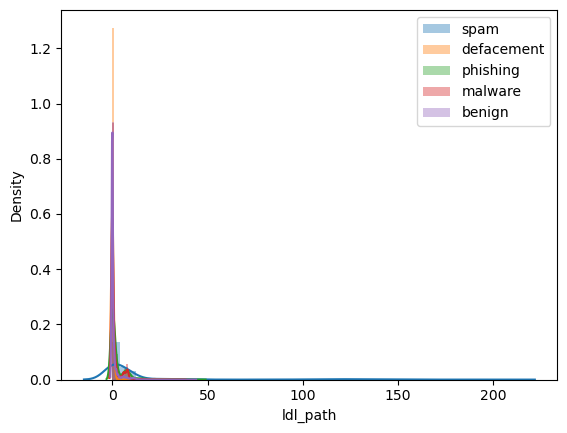

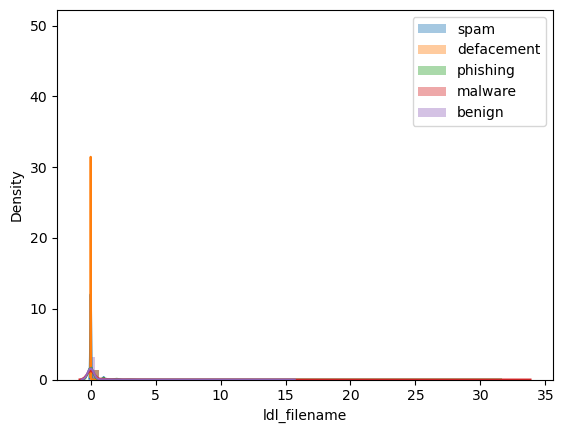

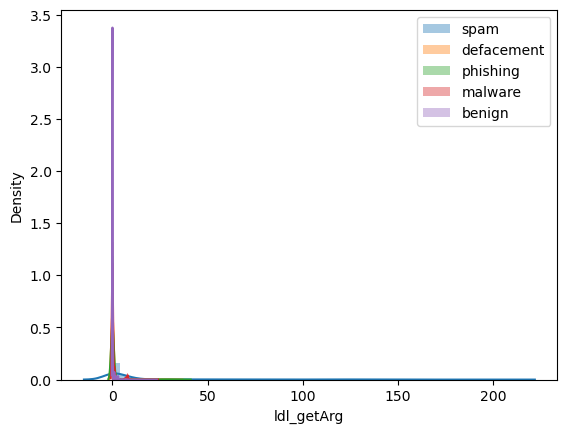

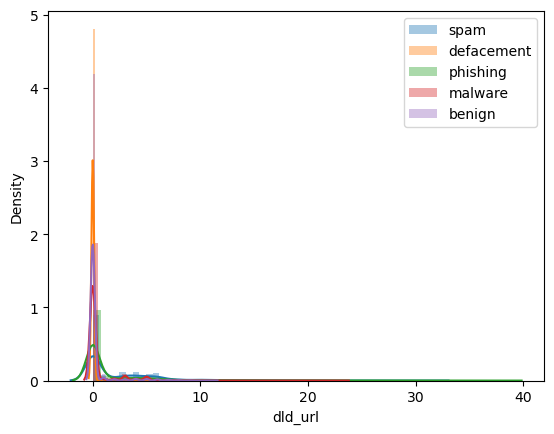

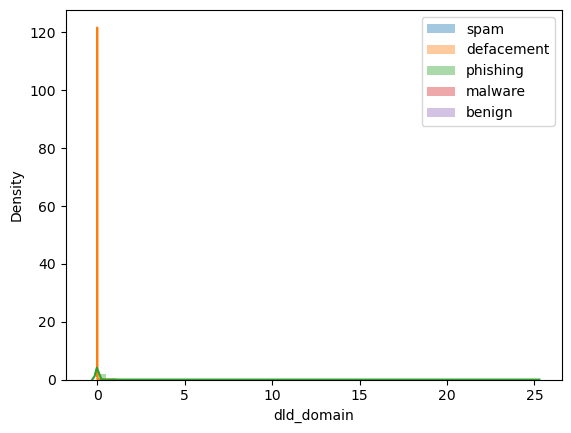

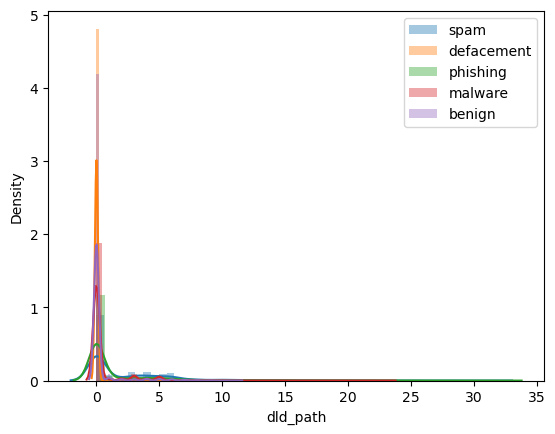

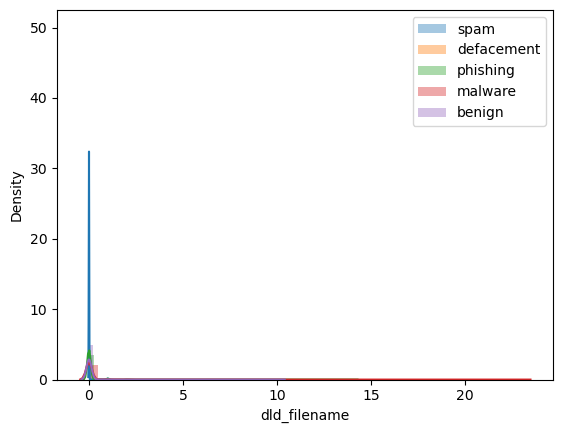

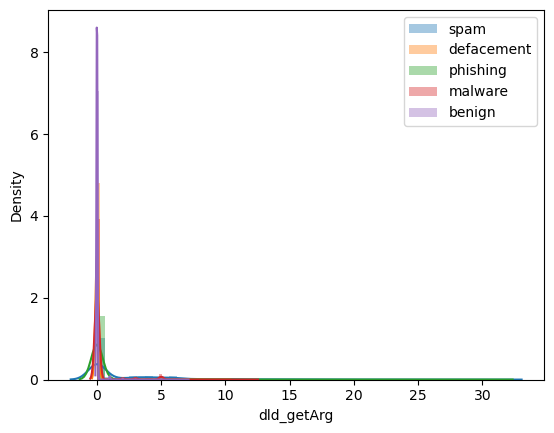

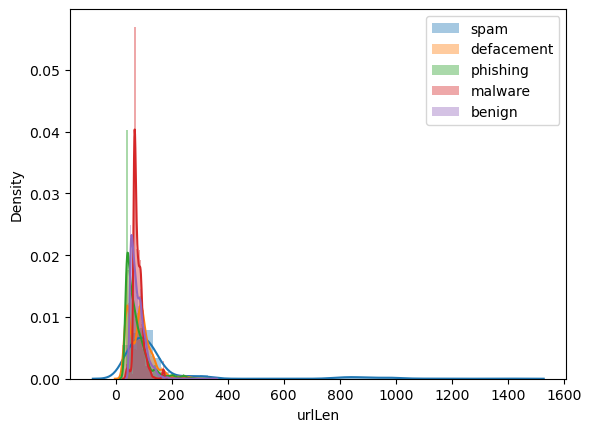

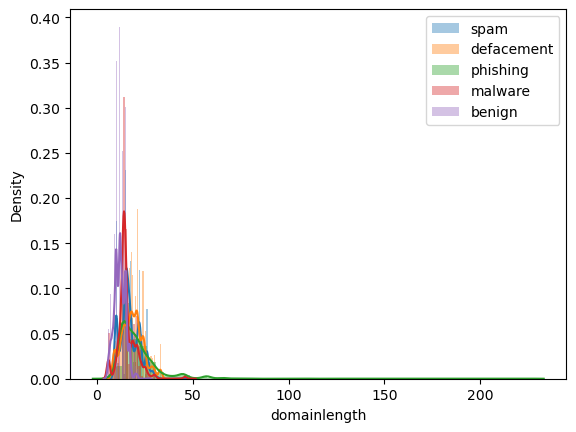

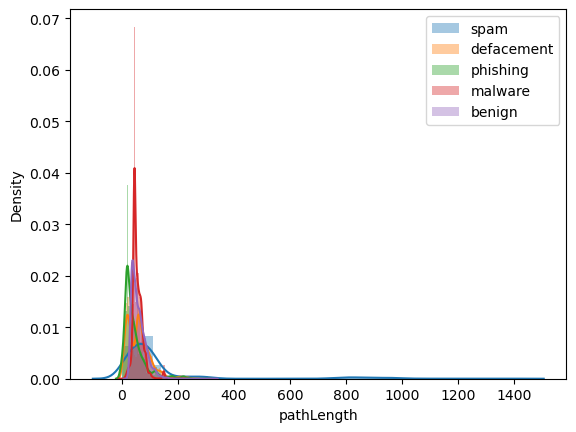

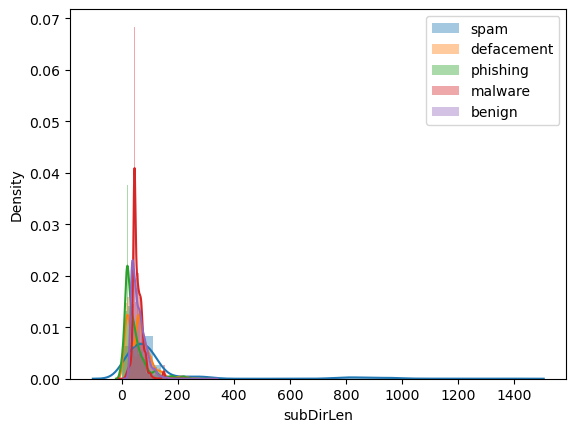

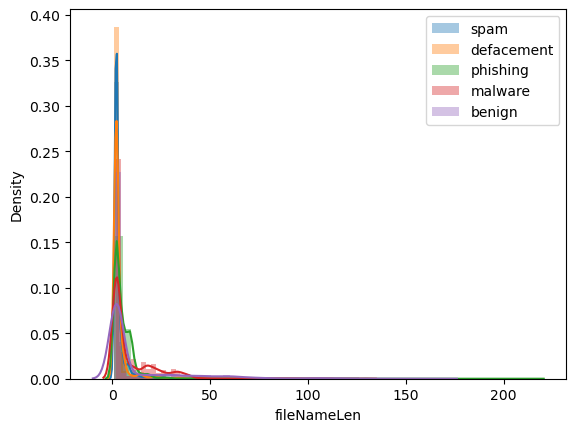

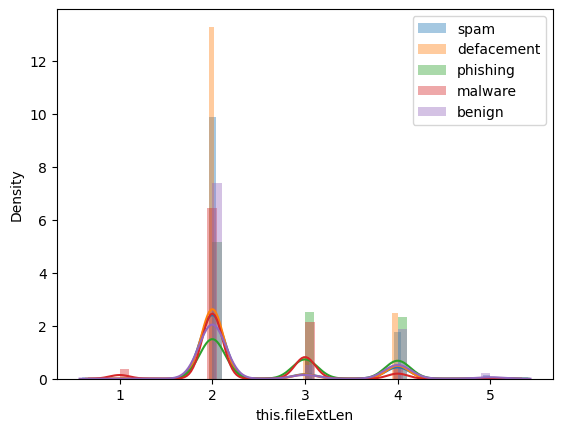

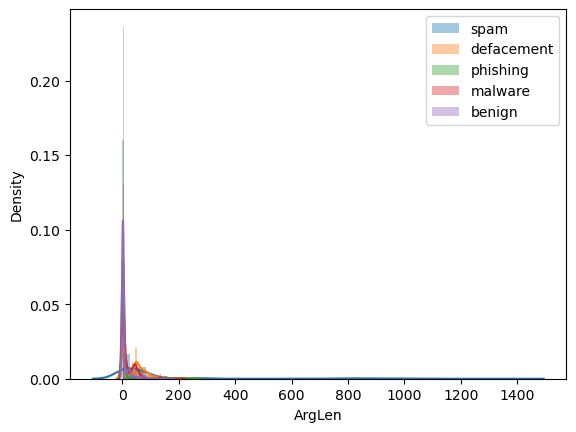

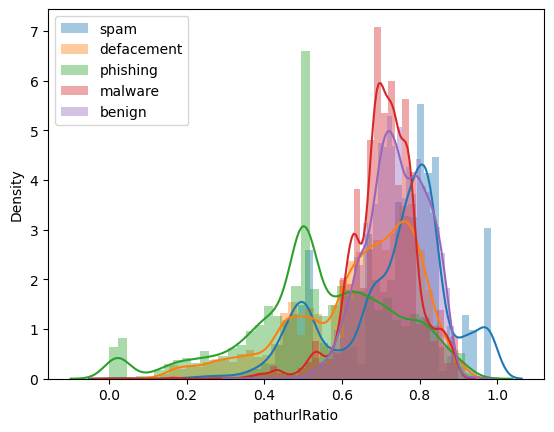

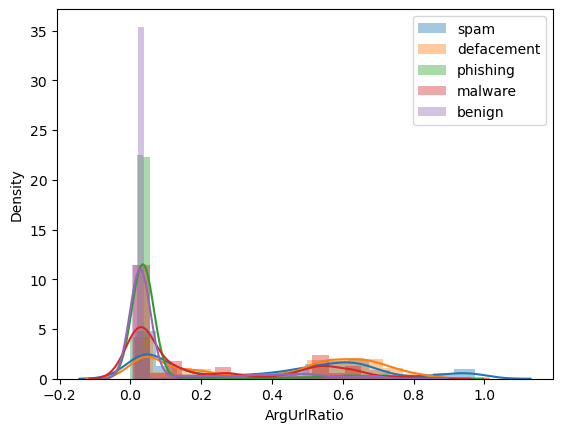

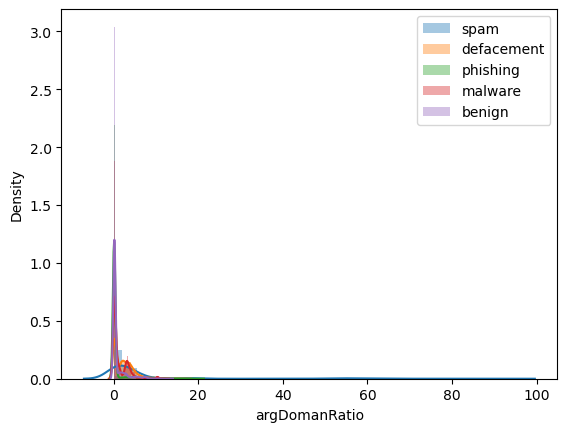

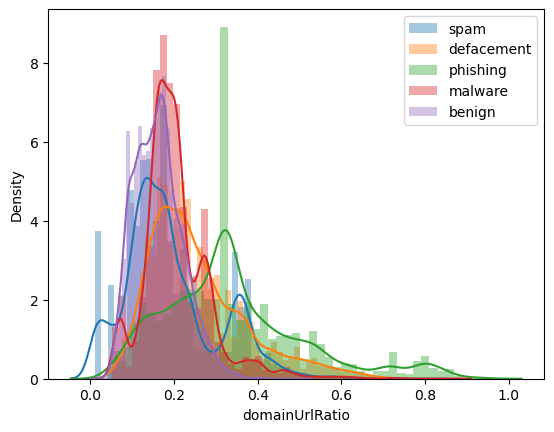

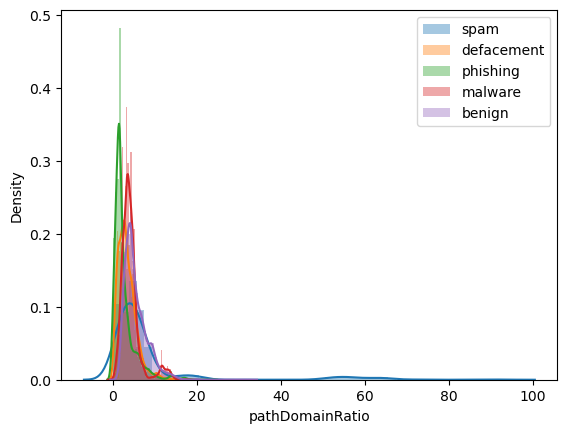

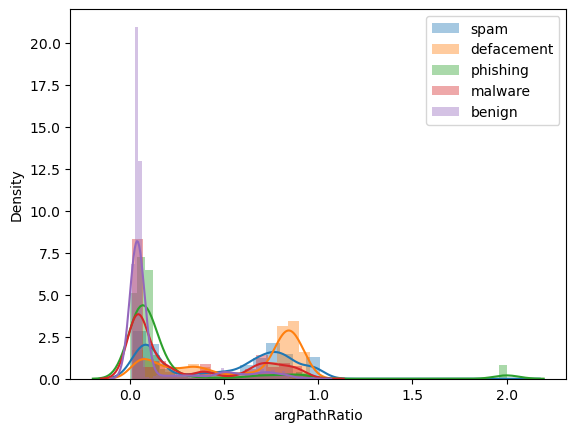

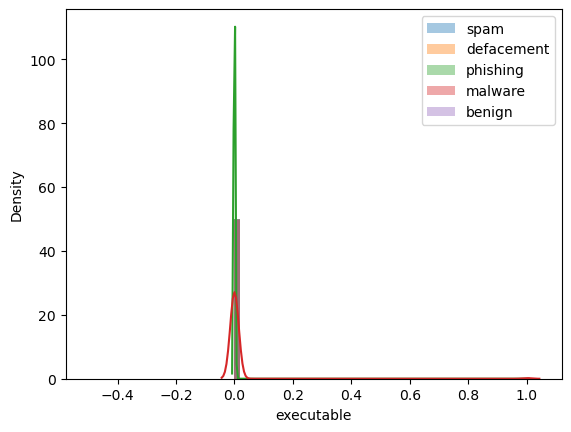

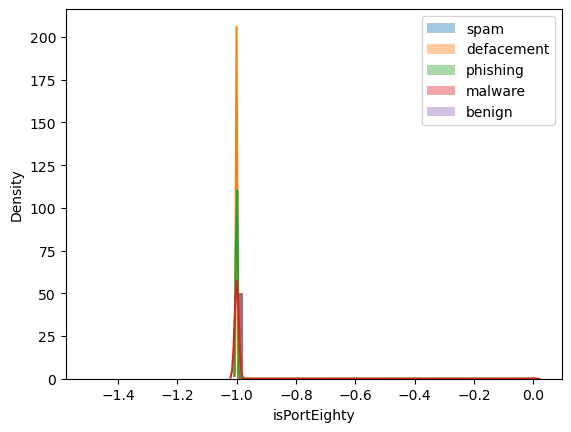

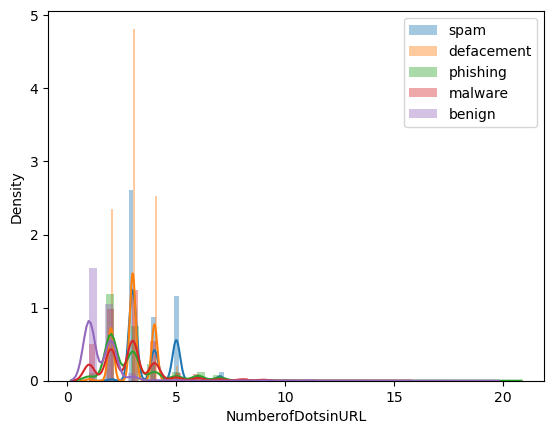

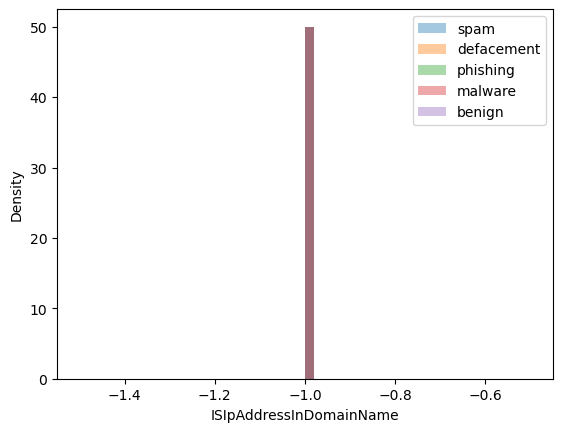

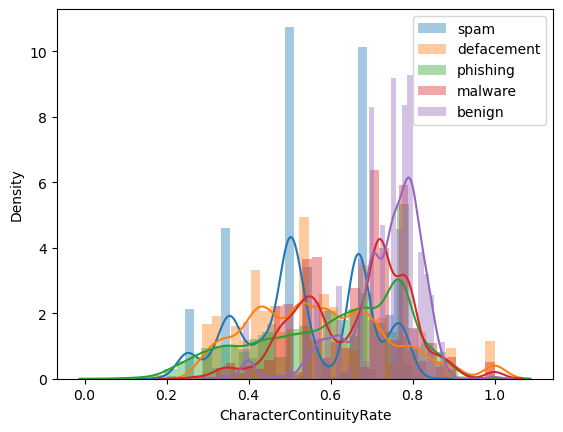

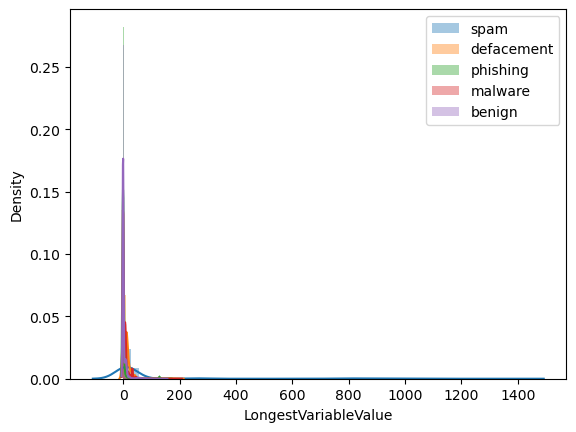

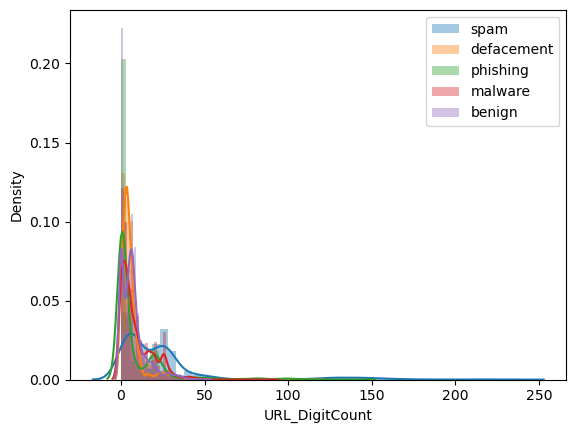

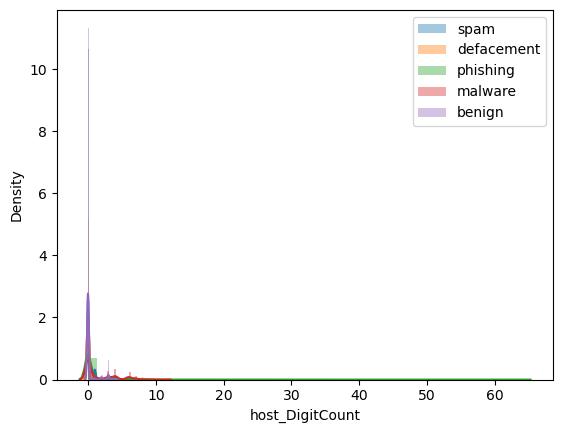

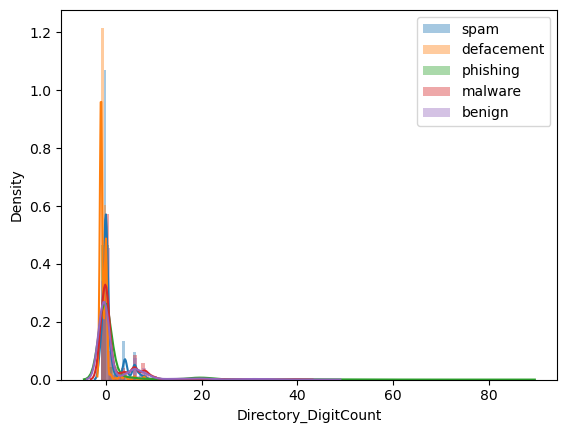

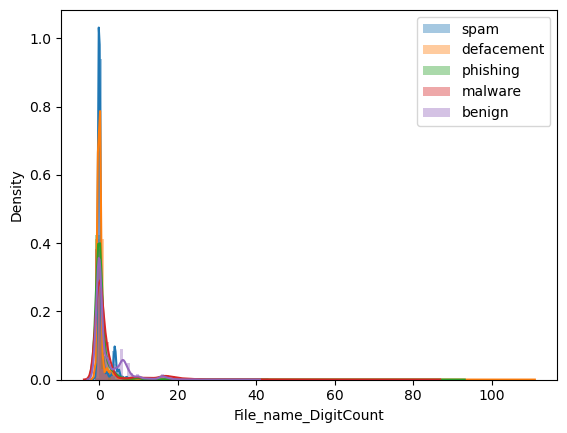

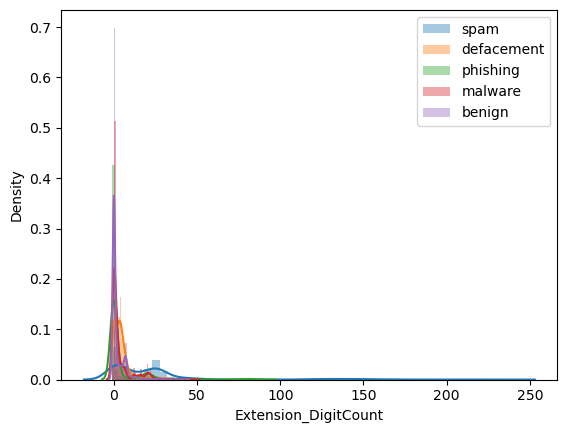

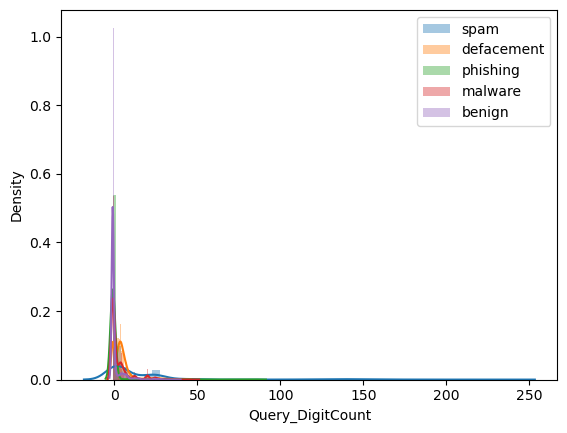

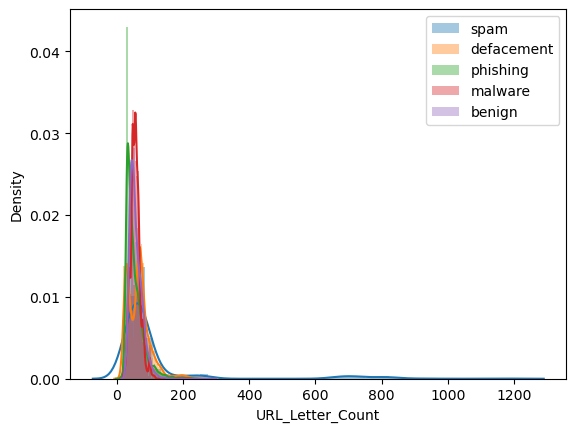

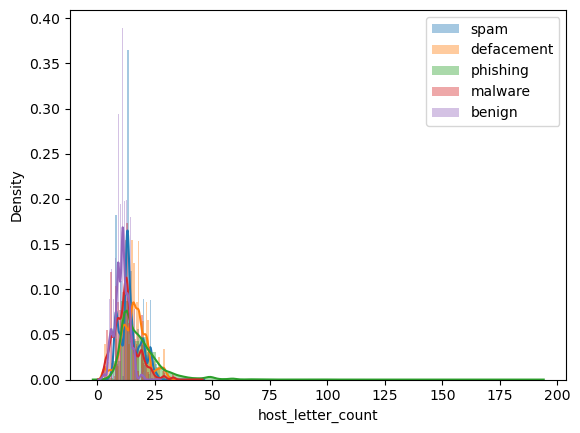

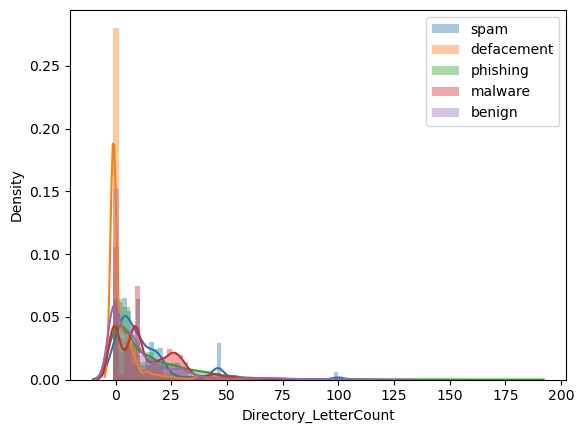

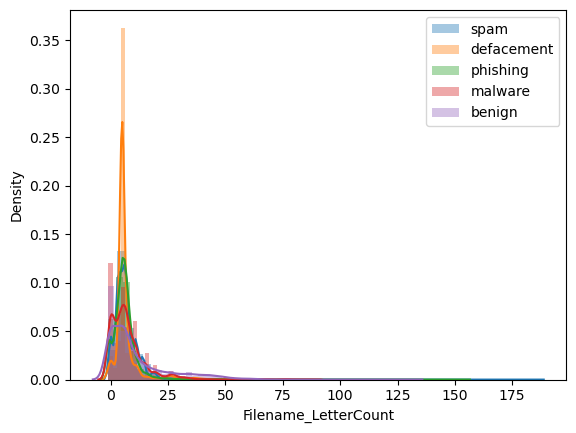

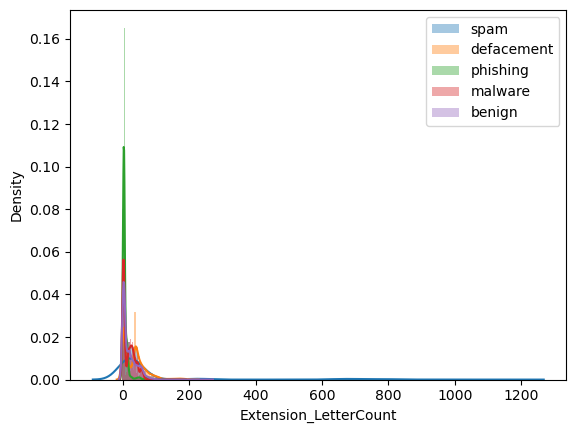

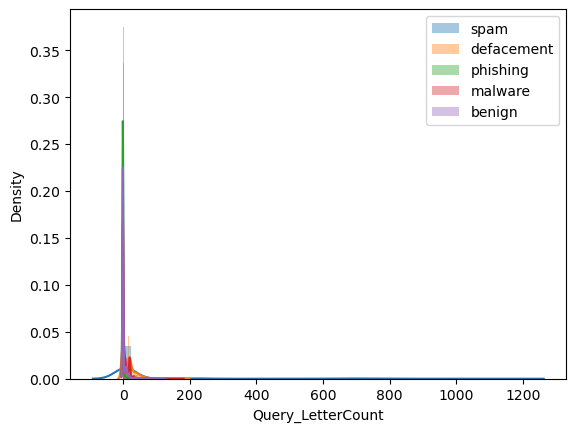

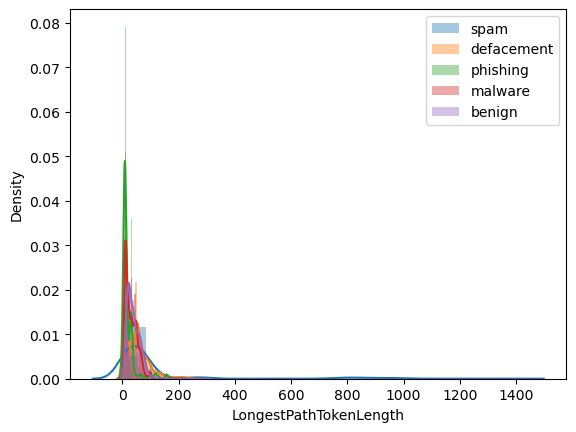

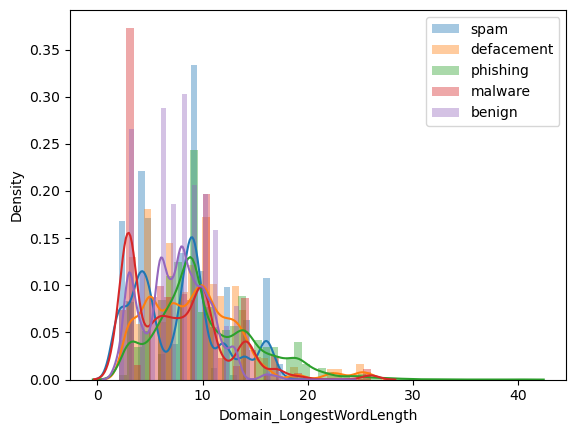

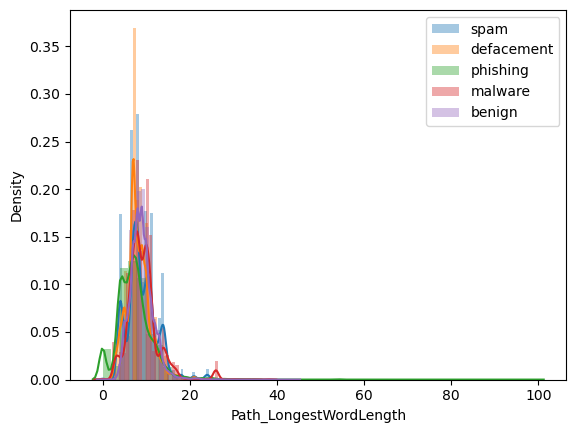

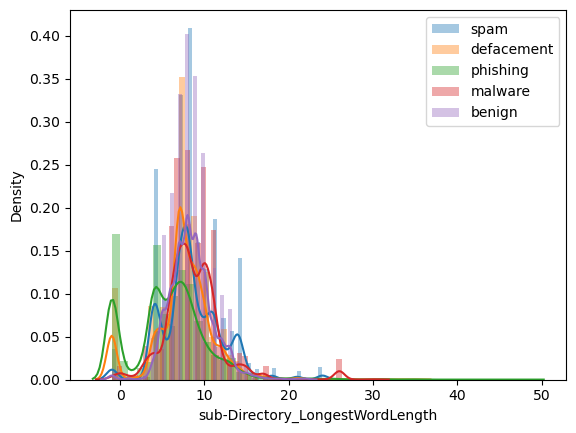

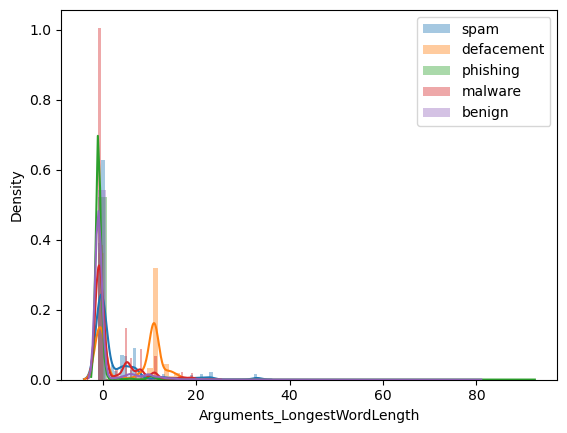

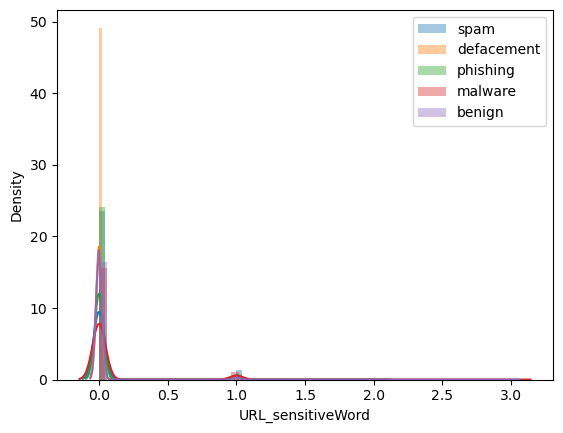

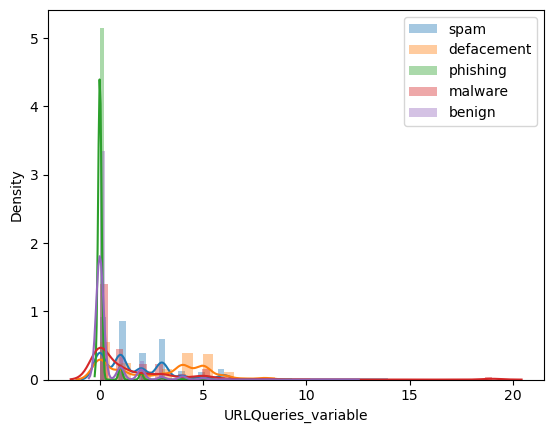

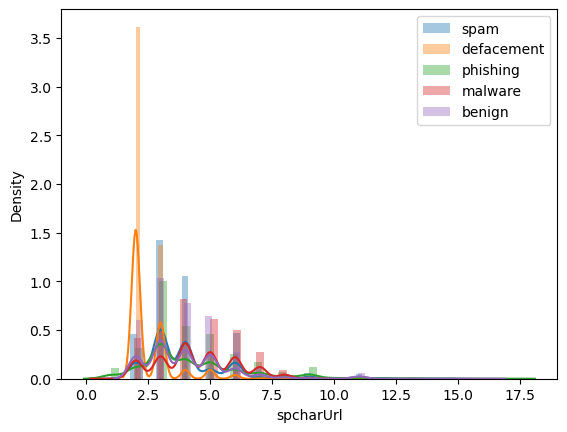

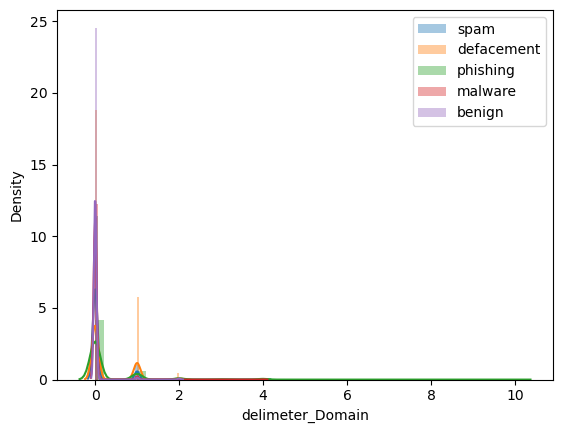

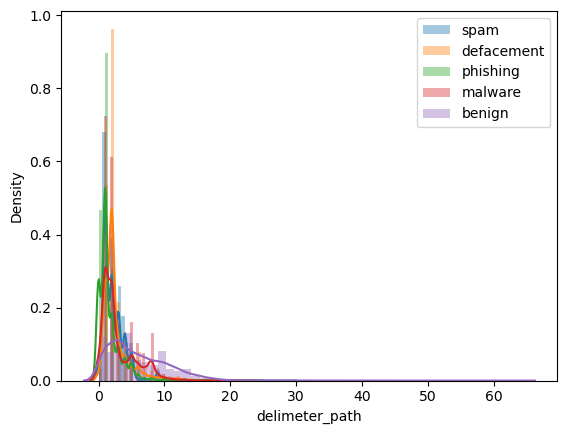

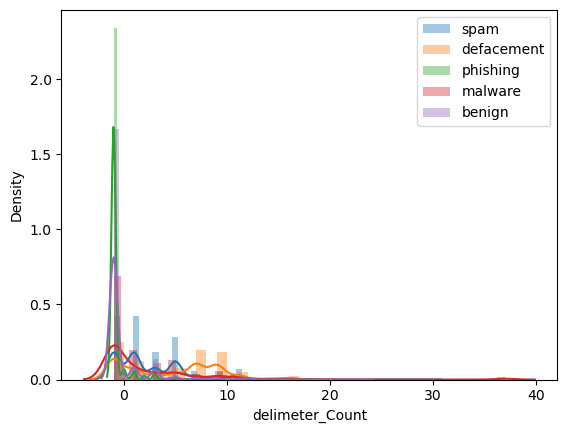

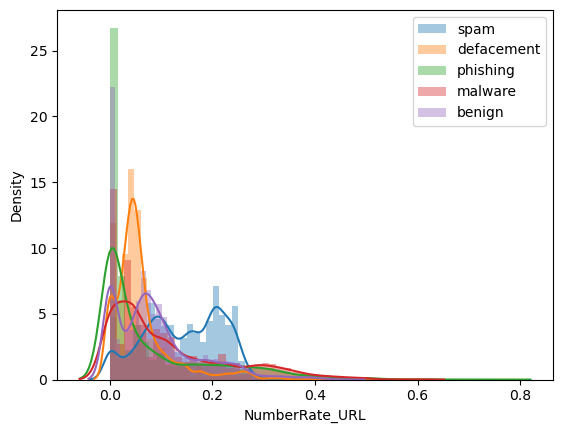

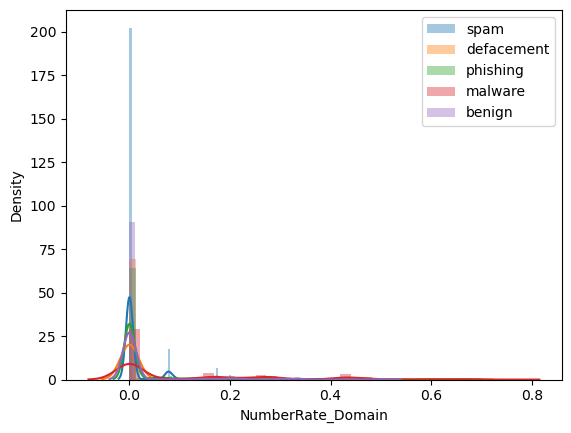

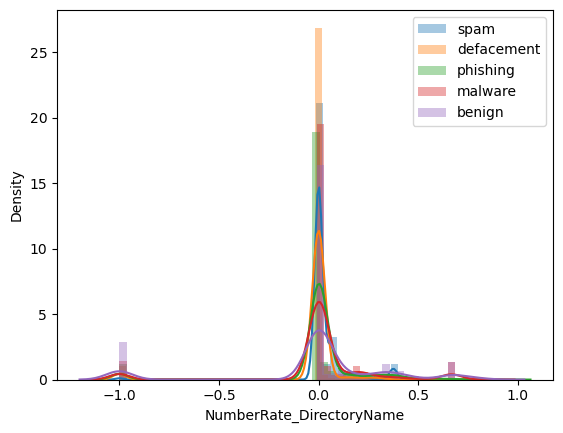

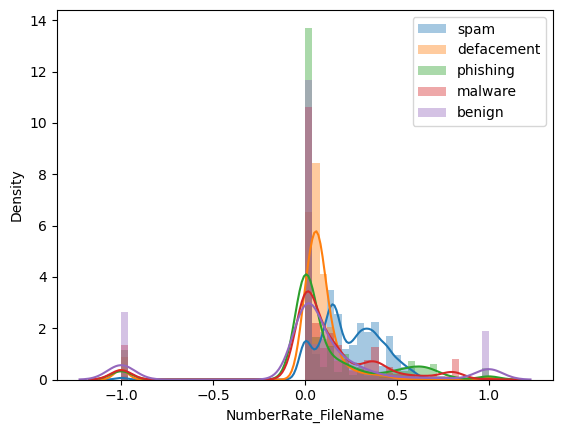

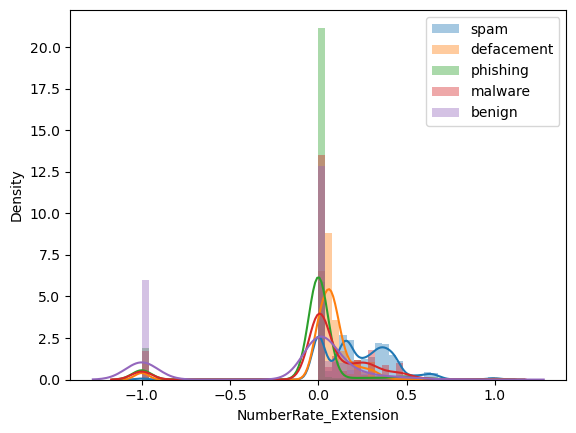

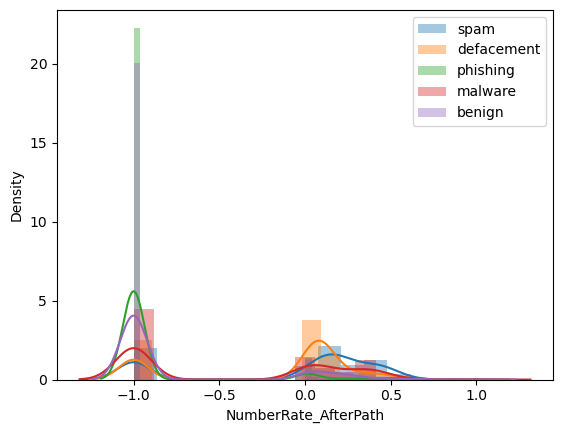

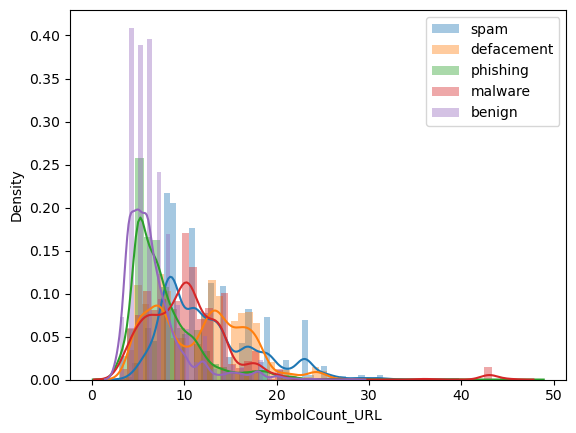

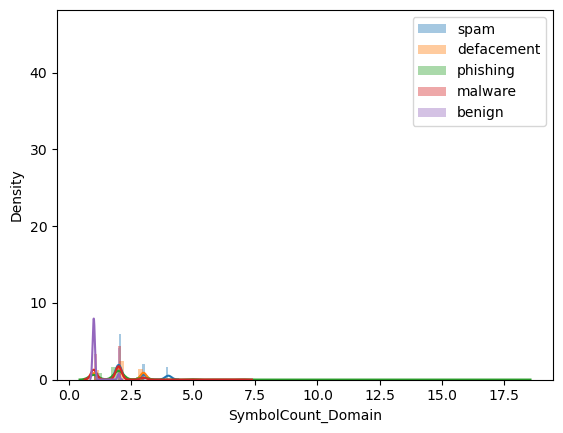

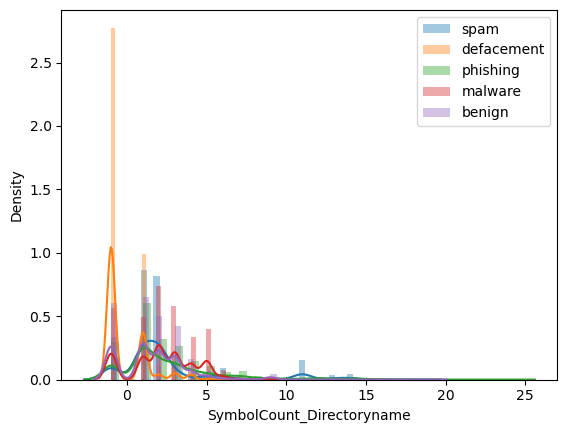

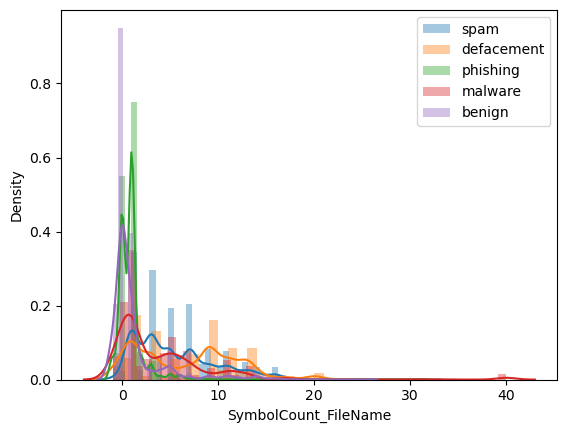

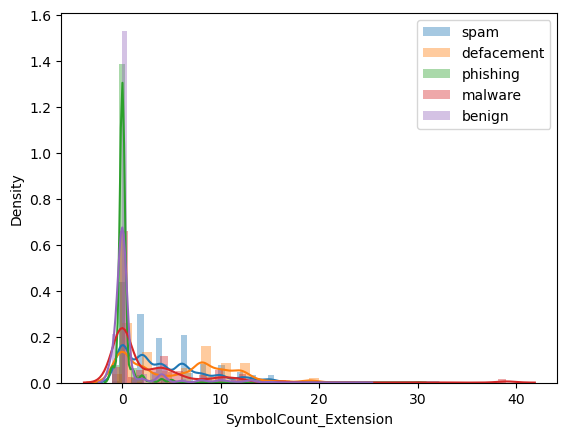

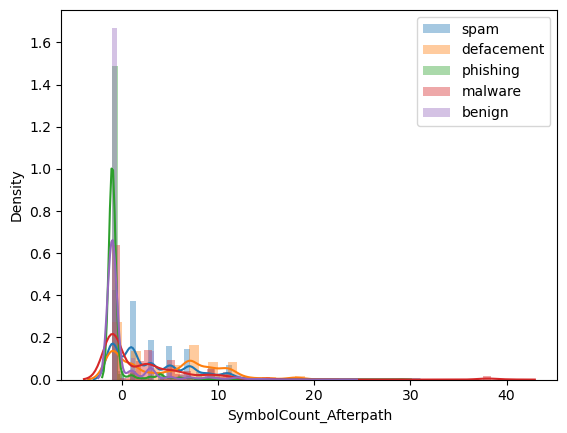

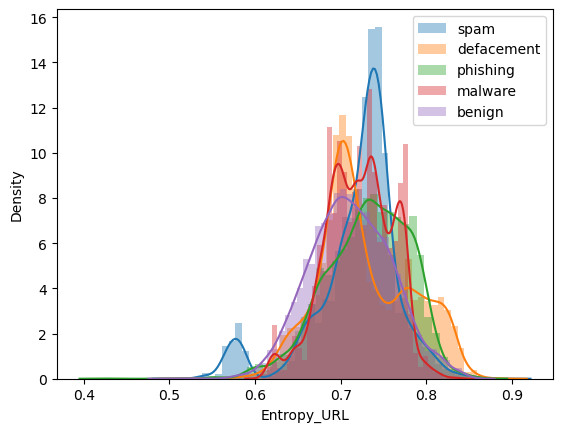

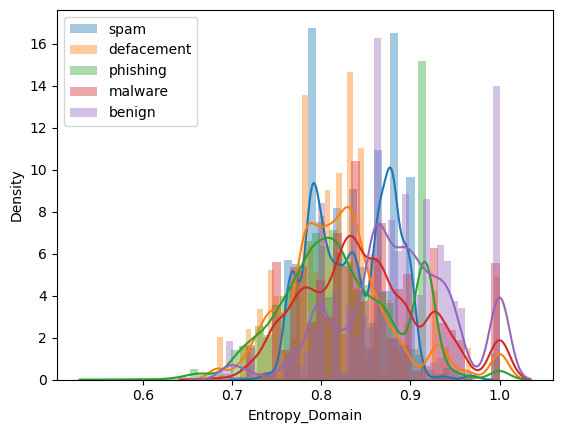

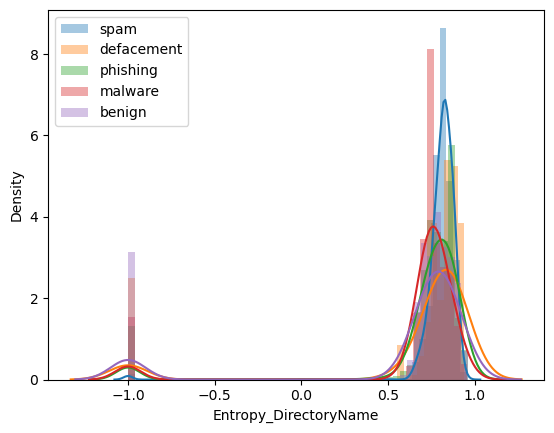

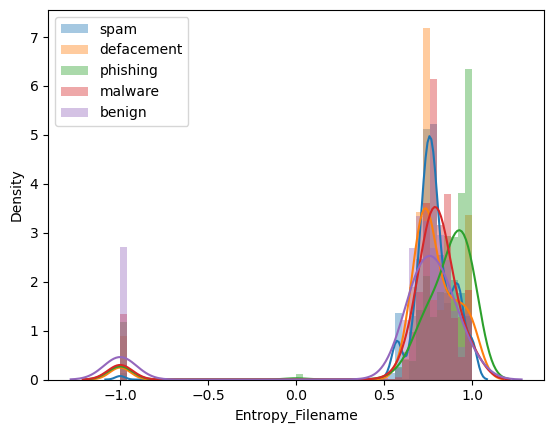

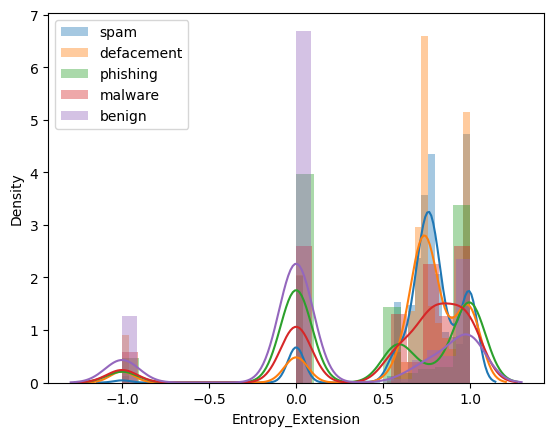

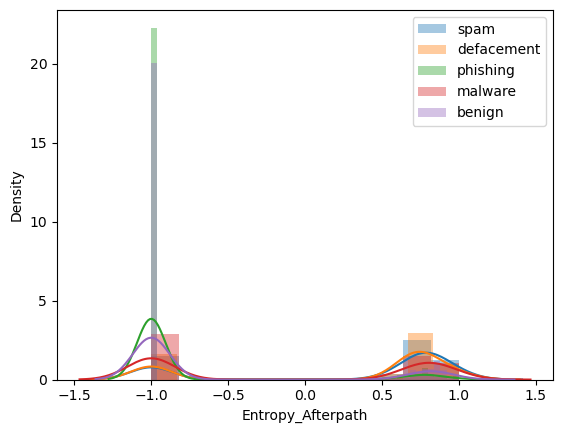

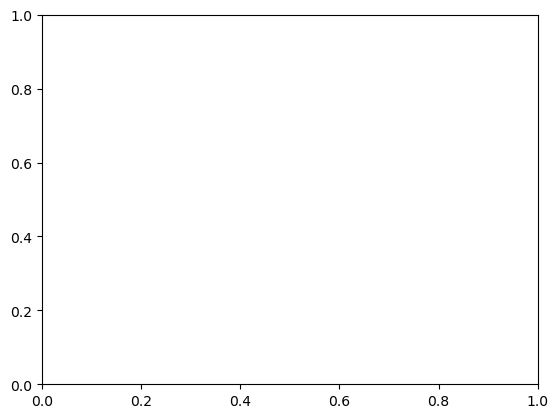

In [58]:
for col in df.columns:
    plt.figure()
    sns.distplot(spam_df[col], label = "spam")
    sns.distplot(defacement_df[col], label = "defacement")
    sns.distplot(phishing_df[col], label = "phishing")
    sns.distplot(malware_df[col], label = "malware")
    sns.distplot(benign_df[col], label = "benign")
    plt.legend()
